# NOTE: THIS CODE IS MODIFIED FROM A CLASSROOM LESSON. PARTS OF THE EXPLANATORY TEXT REMAIN

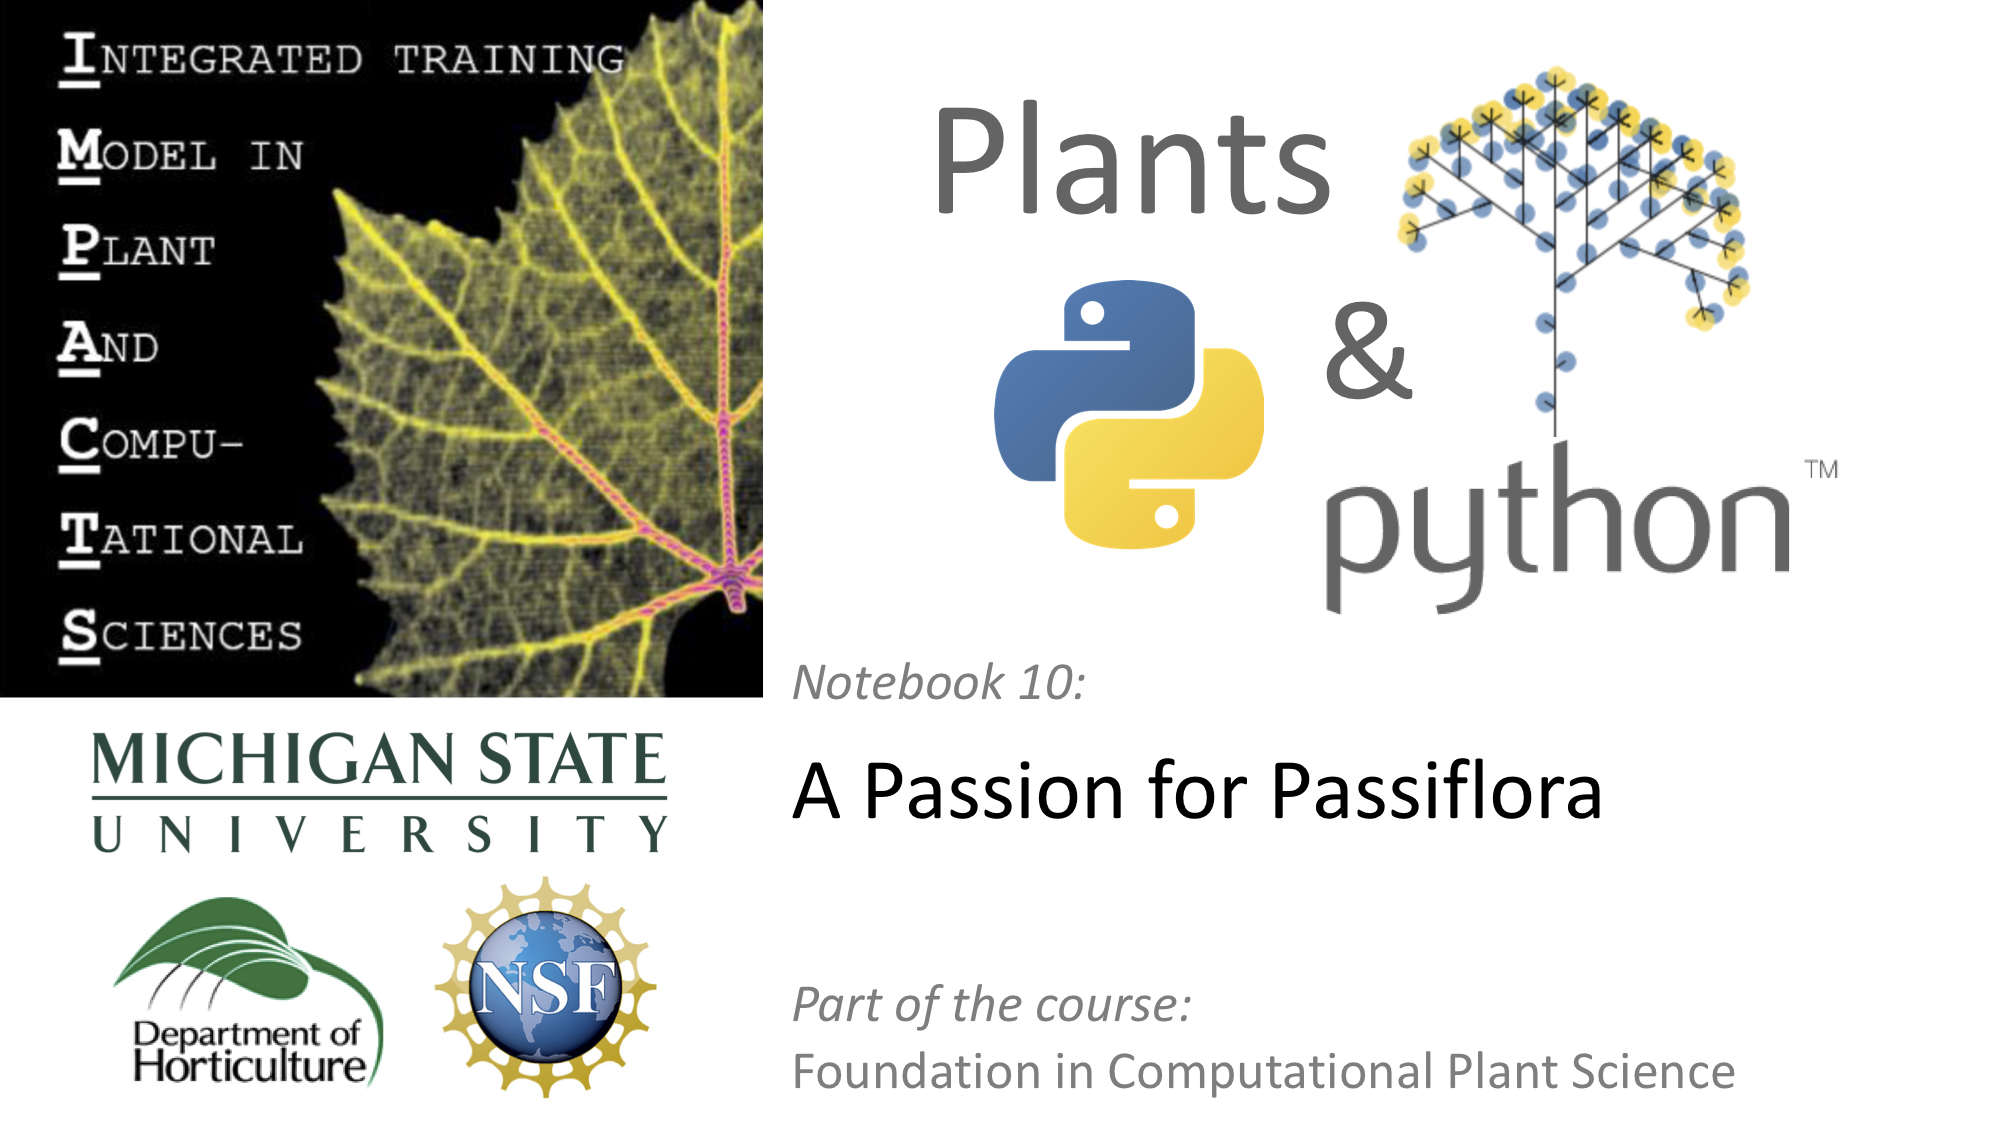

____
# A Passion for Passiflora

In the previous notebook, we learned about how to manipulate datasets and do statistics using `pandas`, as well as how to model data by fitting curves using the `polyfit()`, `poly1d()`, and `curve_fit()` functions. Fitting curves made a lot of sense for the climate data that we were looking at: afterall, global temperature is a curve that is increasing in value! But fitting curves and modeling data can be used in more abstract ways.

In this notebook, we will be analyzing morphometric data from "[Morphometric analysis of Passiflora leaves: the relationship between landmarks of the vasculature and elliptical Fourier descriptors of the blade](https://academic.oup.com/gigascience/article/6/1/giw008/2865207)", by Chitwood and Otoni (GigaScience, 6(1), 2017). In this work, the shapes of 40 different *Passiflora* species are analyzed. You probably have seen the beautiful flowers of *Passiflora* species. But they have diverse leaf shapes as well: [one hypothesis](https://www.frontiersin.org/articles/10.3389/fevo.2016.00081/full) is that *Passiflora* species evolved different leaf shapes to evade butterflies that recognize the shapes and lay their eggs on the leaves!

The way that leaf shape is measured is by putting ***landmarks*** on morphological features. These landmarks correspond to features that can be found on every leaf. Landmarks are simply `x` and `y` coordinate values measured from a 2D scan of leaves. There is a problem, though: how do we superimpose these coordinates to meaningfully analyze them? A [Procrustes analysis](https://en.wikipedia.org/wiki/Procrustes_analysis) is used to ***translate***, ***scale***, and ***rotate*** the shapes so that they can be superimposed, minimizing a statistic known as the Procrustes distance.

In the figure below, take a look at the different landmarks used to mark *Passiflora* leaves. The numbers correspond to the data that you will be analyzing today.

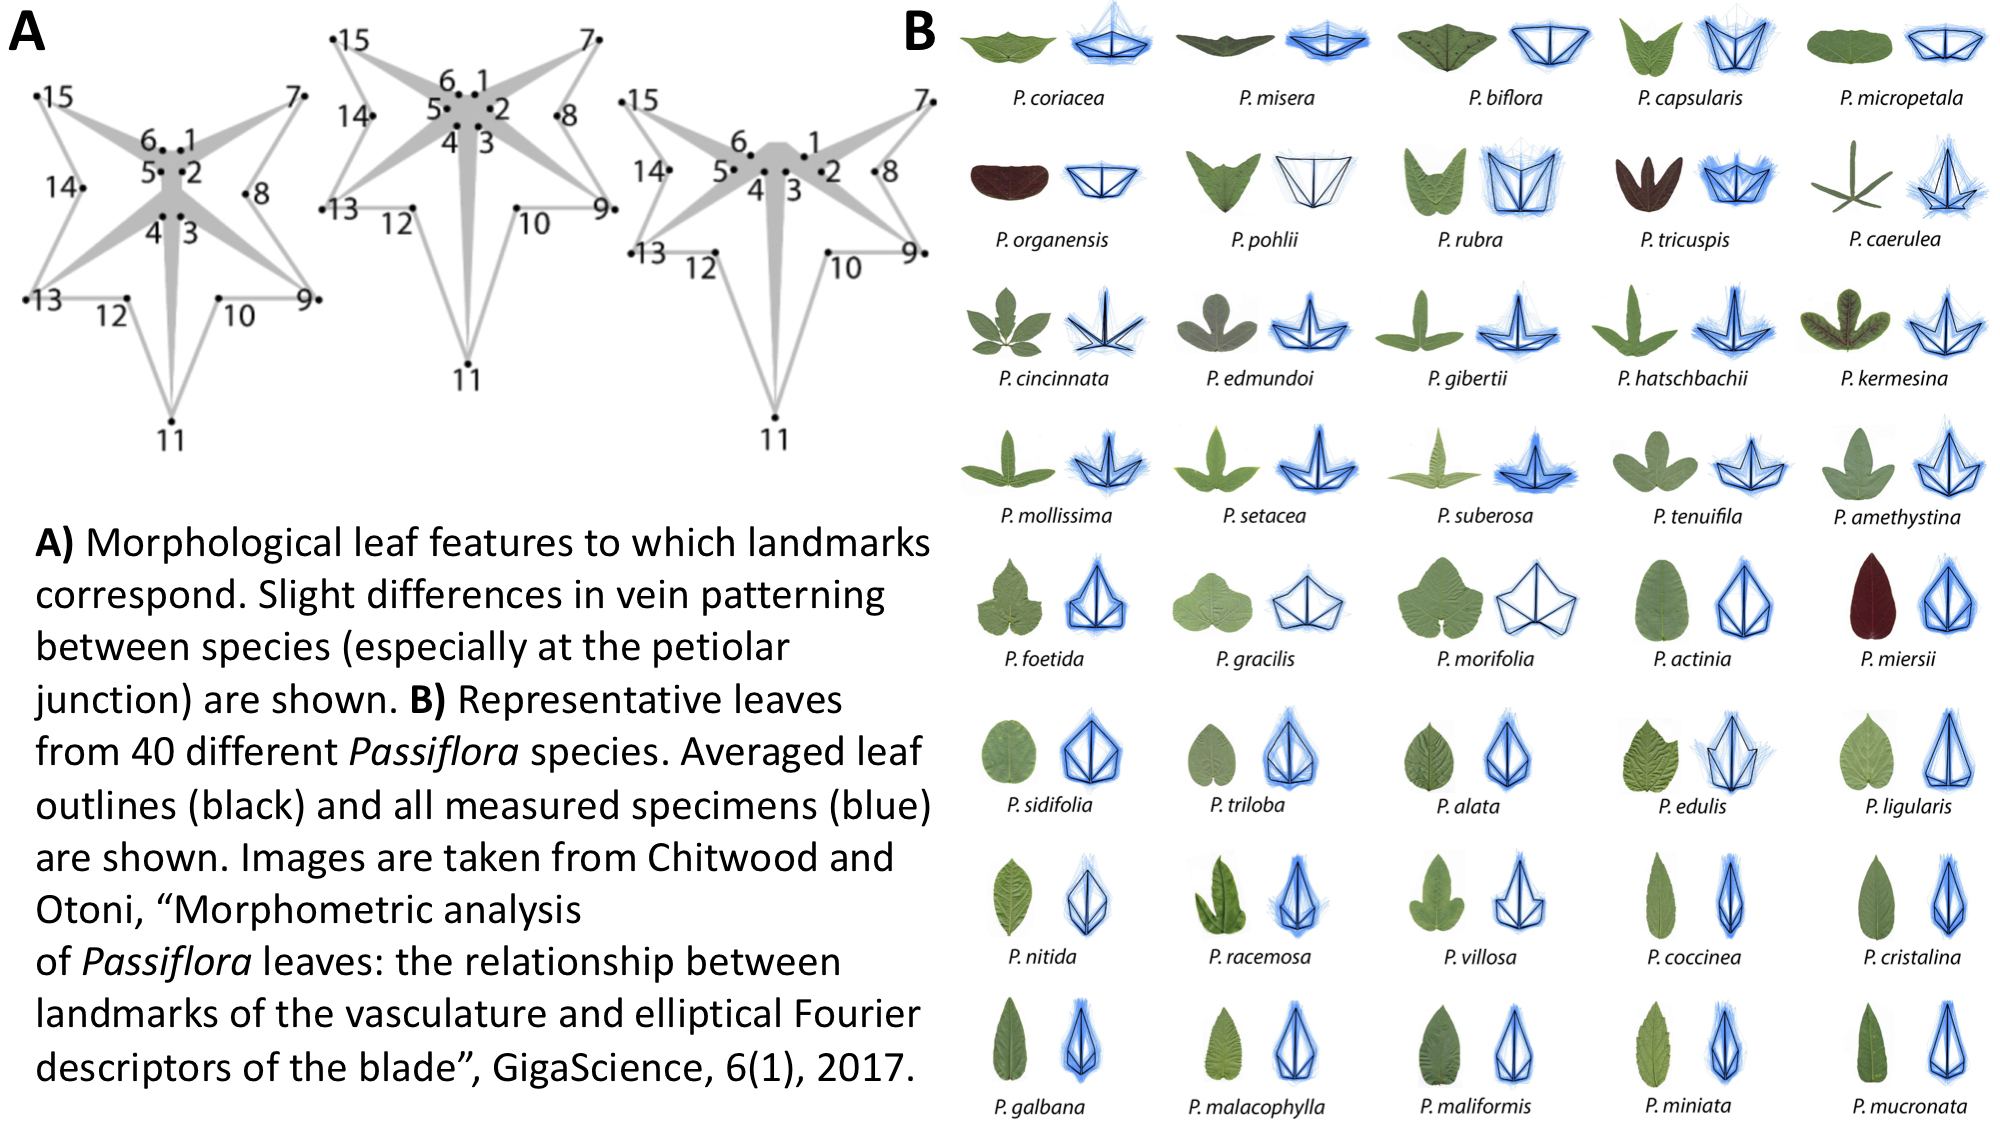

_____
## Data exploration

Today we will be modeling changes in leaf shape across the vines of *Passiflora* species. ***Heteroblasty*** is the changes in leaf shape that occur as a plant transitions from juvenile to adult vegetative growth, also known as phase change. Heteroblasty is changes in the form and function of the first leaves produced to those produced just before flowering. Heteroblasty can be subtle or profound, it can affect shape but other traits as well, and it may or may not have functional consequences, depending on context. One view of heteroblasty is that it reflects temporal changes in the vegetative shoot apical meristem as it progresses to flowering.

The dataset we will be working with today can be downloaded [here](https://github.com/DanChitwood/PlantsAndPython/blob/master/procrustes_landmarks.csv): `procrustes_landmarks.csv`.

The dataset has the following columns:
* `plant`: an ID for each plant
* `species`: the species epithet
* `ontogeny`: the leaf number starting at the tip of the shoot counting to the base
* `total`: the total number of leaves for each plant
* `heteroblasty`: the leaf number starting at the base of the shoot counting to the tip
* Coordinates: `x` and `y` coordinate values, numbered by the landmark they correspond to

First import `matplotlib.pyplot` (as well as the inline functionality), `numpy`, and `pandas`

In [81]:
### ANSWER ###

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

Next, read in the `procrustes_landmarks.csv` file as a pandas dataframe in the cell below.

In [82]:
### ANSWER ###

data = pd.read_csv("procrustes_landmarks.csv")

Examine the first five lines of the dataframe.

In [83]:
### ANSWER ###

data.head()

,plant,species,ontogeny,total,heteroblasty,x1,y1,x2,y2,x3,...,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15
0,Pact1,actinia,1,17,17,1.939415,414.812913,-7.047279,385.719915,28.429685,...,-108.831734,-1510.662028,563.252807,-424.176777,570.669793,-326.497673,405.345149,249.386171,381.749535,279.209462
1,Pact1,actinia,2,17,16,-27.972095,433.154746,-27.127051,417.953521,-17.138482,...,28.713845,-1468.443026,525.022693,-425.378430,538.426886,-343.900676,489.936964,124.340190,467.627131,173.870135
2,Pact1,actinia,3,17,15,-43.242816,430.053913,-39.277936,409.976781,-34.239161,...,120.698695,-1462.301694,546.694706,-517.910591,557.727421,-406.283138,488.911001,155.339518,460.348932,210.137903
3,Pact1,actinia,4,17,14,-36.082509,416.832663,-30.527203,394.236217,-19.829324,...,-58.899860,-1385.313503,535.019483,-519.980964,617.977373,-346.868643,517.511348,207.452944,483.026127,261.141674
4,Pact1,actinia,5,17,13,-7.724386,362.852233,-18.024917,347.266408,-16.965580,...,82.426785,-1493.947554,572.248040,-473.575088,591.964194,-391.158971,440.811250,275.545461,392.206108,308.648330


Use a pandas function to determine the names of the unique species represented in this dataset.

In [84]:
### ANSWER ###

data['species'].unique()

array(['actinia', 'alata', 'amethystina', 'biflora', 'caerulea',
       'capsularis', 'cincinnata', 'coccinea', 'coriacea', 'cristalina',
       'edmundoi', 'edulis', 'foetida', 'galbana', 'gibertii', 'gracilis',
       'hatschbachii', 'kermesina', 'ligularis', 'maliformis',
       'malacophylla', 'micropetala', 'miersii', 'miniata', 'misera',
       'mollissima', 'morifolia', 'mucronata', 'nitida', 'organensis',
       'pohlii', 'racemosa', 'rubra', 'setacea', 'sidifolia', 'suberosa',
       'tenuifila', 'triloba', 'tricuspis', 'villosa'], dtype=object)

Using a pandas function, determine for each species how many leaves were measured.

In [85]:
### ANSWER ###

data['species'].value_counts()

suberosa        151
tricuspis       147
misera          135
miersii         133
coriacea        131
racemosa        128
sidifolia       119
foetida         114
galbana         109
cristalina      104
actinia          95
setacea          94
alata            94
miniata          93
coccinea         93
mucronata        88
malacophylla     87
hatschbachii     82
triloba          82
edmundoi         81
ligularis        81
gibertii         81
capsularis       79
amethystina      78
maliformis       75
biflora          69
mollissima       69
rubra            68
micropetala      68
organensis       66
tenuifila        64
kermesina        62
villosa          58
caerulea         54
edulis           44
nitida           40
gracilis         37
cincinnata       28
morifolia        27
pohlii           11
Name: species, dtype: int64

Using a pandas, make a histogram of the total number number of leaves per plant

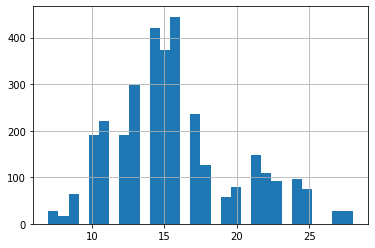

In [86]:
### ANSWER ###

data['total'].hist(bins=30)

___
## Masking and data clean up

Let's clean up our data a little bit before using it. Looking at the histogram of total leaves you just made, maybe we don't want to include plants with < 10 leaves.  Use a mask to remove all leaves that came from plants with a `total` leaf number < 10. Remember: a mask is just a Boolean statement to select those rows that are `True`. Call the new, masked dataset `at_least_10`.

In [87]:
### ANSWER ###

at_least_10 = data[ data['total'] >= 10 ]

Now, going further, let's restrict our analysis to the ten species with the most leaves. Use the `value_counts()` function on the dataframe `at_least_10` to find the counts for each species. You can treat the resulting output like a list, and index it similarly. On the same line of code that you use `.value_counts()`, append square brackets on the end and with the `[start:end]` format, restrict the output to the eight species with the most leaves.

In [88]:
### ANSWER ###

at_least_10['species'].value_counts()[0:10]

tricuspis     147
misera        135
miersii       133
suberosa      128
racemosa      128
sidifolia     119
coriacea      117
foetida       114
galbana       109
cristalina    104
Name: species, dtype: int64

For the ten species with the most leaves, use masks to create new dataframes for each that only contain leaves from each species. Name each dataframe after the species epithet. Use the `at_least_10` dataframe as the starting dataframe that you mask.

In [89]:
### ANSWER ###

tricuspis = at_least_10[ at_least_10['species']=="tricuspis" ]
misera = at_least_10[ at_least_10['species']=="misera" ]
miersii = at_least_10[ at_least_10['species']=="miersii" ]
suberosa = at_least_10[ at_least_10['species']=="suberosa" ]
racemosa = at_least_10[ at_least_10['species']=="racemosa" ]
sidifolia = at_least_10[ at_least_10['species']=="sidifolia" ]
coriacea = at_least_10[ at_least_10['species']=="coriacea" ]
foetida = at_least_10[ at_least_10['species']=="foetida" ]
galbana = at_least_10[ at_least_10['species']=="galbana" ]
cristalina = at_least_10[ at_least_10['species']=="cristalina" ]

___
## Visualization

Let's visualize some of our data!

Remember that we use the `.iloc` function to select specific data within a dataframe. We can isolate rows and columns using the following notation with `.iloc`: `[row_start:row_end , col_start:col_end]`. You can isolate non-continuous sets of rows and columns using the following format: `[ [0]+[2]+[5] : [3]+[7]+[11] ]`

Below, are the sequence of landmarks that specify the vein and blade structures of the landmarked leaves. These sequences of landmarks will create polygons for veins and blades that you can you use to plot out the leaves and inspect them, using the respective `x` and `y` coordinate values.

```python
x values, veins: [5]+[17]+[7]+[21]+[9]+[25]+[11]+[29]+[13]+[33]+[15]+[5]
y values, veins: [6]+[18]+[8]+[22]+[10]+[26]+[12]+[30]+[14]+[34]+[16]+[6]

x values, blade: [5]+[17]+[19]+[21]+[23]+[25]+[27]+[29]+[31]+[33]+[15]+[5]
y values, blade: [6]+[18]+[20]+[22]+[24]+[26]+[28]+[30]+[32]+[34]+[16]+[6]
```

Let's explore some of the shape changes that occur during heteroblasty, across the vine. The "shape", what is being modeled in this case, is actually 30 different `x` and `y` values representing 15 landmarks! Let's step back and explore just one landmark in one species.

If you notice in the example figure of heteroblastic leaf shape changes, leaves tend to get more lobed as the heteroblastic series progresses. Let's examine how the landmark `y12` behaves, which represents the sinus of the distal lobe. And let's use the species `tricuspis`, the most abundant.

In the last lesson, we learned how to use `np.polyfit()` and `np.poly1d()` to fit a polynomial model to data.

In the cell below, model `y12` as a function of `heteroblasty`. Like we did in the last lesson, immediately graph the results. Graph the real data, and also graph the modeled data using your new function derived from `poly1d()`. Use `np.linspace()` to model value x values from the minimum to maximum heteroblasty values.

Try out different orders of polynomials. Look at different landmarks. What is an appropriate order of polynomial to model this data?

[   1.31125349   -8.34445135 -522.41041392]


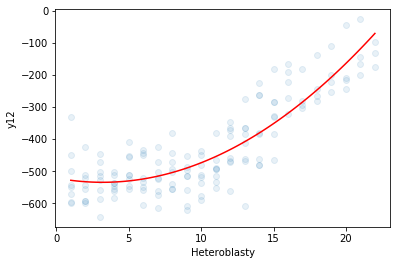

In [90]:
### ANSWER ###

import numpy as np

N = np.polyfit(tricuspis['heteroblasty'], tricuspis['y12'],2)
func = np.poly1d(N)

plt.scatter(tricuspis['heteroblasty'], tricuspis['y12'], alpha=0.1)
plt.plot( np.linspace(min(tricuspis['heteroblasty']), max(tricuspis['heteroblasty']), 100),
         func(np.linspace(min(tricuspis['heteroblasty']), max(tricuspis['heteroblasty']), 100)), color="r")
plt.xlabel("Heteroblasty")
plt.ylabel("y12")

print(N)



Finally, let's create our function. Call your function `format_array` and the input is `dataframe`. Use the `.drop()` function to drop columns `plant`, `species`, `ontogeny`, and `total` and then use `.values` to convert to an array.

Your function should `return` an array called `species_array`.

In [91]:
def format_array(dataframe):
    
    species = dataframe
    species_vals = species.drop(columns=['plant','species','ontogeny','total'])
    species_array = species_vals.values
    
    return species_array

Great! Now we have a function to drop the columns of our dataframe and convert it to an array. You have also created functions to model polynomials as a function of heteroblasty. Let's put it all together!

Below, is a function called `model_landmarks`. It takes a `dataframe`, an order of polynomial to fit called `poly_order`, and something called `xvals`. `xvals` ends up being the number of steps using `np.linspace()` that we decide to model. You can think of it as how many points along the x-axis (heteroblasty) that we will be modeling.

The function then uses the `format_array` function to create an array. It then creates an array filled with zeros to hold the data that we will be generating using the `np.zeros()` function. The dimensions of this array are 30 (for each landmark value) by `xvals`, which is the number of modeled leaf shapes we will be generating.

Then, we loop over the array! Study the `for` loop. The array always uses the first column, which corresponds to `heteroblasty`, as the x values. It will then iterate over each landmark value as the y values. The model will be of the order `poly_order` that was specified. We then create predicted values called `model_values` from the resulting function using `np.linspace()`, which between the minimum and maximum `heteroblasty` values, create `xvals` number of steps to model leaf shapes. The appropriate row of the array `matrix` is then filled with the values, where rows correspond to each landmark and columns the modeled values across `xvals`.

We then need to ***transpose*** our table! The rows (landmarks) need to be the columns and the columns (modeled values across `xvals`) need to be rows! You will need to transpose often in your research career. There is an easy function for transposing an array: it is called `.T`.

Next, we re-create a dataframe with our transposed array, using the `pd.Dataframe()` function, and we also give the columns names.

Then, we create coordinates, in order, so we can plot the veins and blade, as we had done before. Except now we will have ***modelled*** veins and blade as a continuous series of shapes across the heteroblastic series.

The function returns four dataframes to plot out the modeled leaves: `veins_x`, `veins_y`, `blade_x`, `blade_y`. 

Study the function below and make sure you understand what the code is doing.

In [92]:
def model_landmarks(dataframe, poly_order, xvals):
    
    array = format_array(dataframe)
        
    matrix = np.zeros((30, xvals))

    for i in range(30):

        N = np.polyfit( array[:,0], array[:,i+1], poly_order )
        func = np.poly1d(N)
        model_values = func( np.linspace(min(array[:,0]), max(array[:,0]), xvals) )
        matrix[i,:] = model_values

    Tresults = matrix.T
    
    df = pd.DataFrame(data=Tresults, columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 
                                          'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12',
                                          'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15'
                                         ])
    
    veins_x = df.iloc[:, [0]+[12]+[2]+[16]+[4]+[20]+[6]+[24]+[8]+[28]+[10]+[0] ]
    veins_y = df.iloc[:, [1]+[13]+[3]+[17]+[5]+[21]+[7]+[25]+[9]+[29]+[11]+[1] ]

    blade_x = df.iloc[:, [0]+[12]+[14]+[16]+[18]+[20]+[22]+[24]+[26]+[28]+[10]+[0] ]
    blade_y = df.iloc[:, [1]+[13]+[15]+[17]+[19]+[21]+[23]+[25]+[27]+[29]+[11]+[1] ]
    
    return veins_x, veins_y, blade_x, blade_y




***Make the plot!***

In [93]:
for n in range(55):
    
    print(n)
    frames = 55
    xmin = -1000
    xmax = 1000
    ymin = -450
    ymax = 1700
    a = 0.08
    
    plt.figure(figsize=(16,9))

    ### tricuspis
    
    species = tricuspis
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,1, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='red')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    ### misera
    
    species = misera
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,2, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='orange')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    ### miersii
    
    species = miersii
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,3, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='yellow')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    ### suberosa
    
    species = suberosa
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,4, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='green')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    ### racemosa
    
    species = racemosa
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,5, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='blue')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    ### sidifolia
    
    species = sidifolia
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,6, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='purple')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    ### coriacea
    
    species = coriacea
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,7, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='cyan')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    ### foetida
    
    species = foetida
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,8, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='pink')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    ### galbana
    
    species = galbana
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,9, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='brown')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    ### cristalina
    
    species = cristalina
    
    vx, vy, bx, by = model_landmarks(
        dataframe=species, poly_order=3, xvals=frames)
    
    plt.subplot(2,5,10, aspect="equal")
    plt.plot(vx.T.iloc[:,1:n], -vy.T.iloc[:,1:n], alpha=a, c='k')
    plt.plot(bx.T.iloc[:,1:n], -by.T.iloc[:,1:n], alpha=a, c='k')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.axis("off")
    
    plt.savefig("./temp/"+str(n)+"_temp.jpg")
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
